Task 3 - Experience Analytic

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.cluster import KMeans
import scipy.spatial.distance as dist
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df1 = pd.read_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\finel_data.csv')

In [3]:
df1

,Unnamed: 0,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,email,google,youtube,netflix,gaming,other,total_tp,total_rtt,total_tcp,Decile_rank
0,0,770.0000,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,42.000000,5.000000,23.000000,...,3.701304e+06,2.905912e+06,1.835594e+07,1.785519e+07,2.924265e+08,1.805588e+08,67.000000,47.000000,2.156957e+07,4
1,1,235.0000,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,65.000000,5.000000,16.000000,...,9.373850e+05,4.414096e+06,3.935912e+07,3.556554e+07,6.099208e+08,5.419594e+08,42.000000,70.000000,2.156957e+07,4
2,2,1.0000,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,109.795706,17.662883,6.000000,...,3.363124e+06,1.022912e+07,3.442524e+07,2.375120e+07,2.299803e+08,4.149084e+08,15.000000,127.458589,2.156957e+07,4
3,3,486.0000,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,109.795706,17.662883,44.000000,...,2.070983e+06,1.181176e+07,3.653476e+07,1.509259e+07,8.103879e+08,7.618372e+08,88.000000,127.458589,2.156957e+07,4
4,4,565.0000,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,109.795706,17.662883,6.000000,...,2.110349e+06,7.748843e+06,3.422225e+07,1.753980e+07,5.312370e+08,5.646198e+08,15.000000,127.458589,2.156957e+07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,149996,451.0000,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,32.000000,0.000000,52.000000,...,6.908760e+05,1.278491e+07,2.795510e+07,3.756186e+07,5.358069e+08,1.675193e+07,117.000000,32.000000,2.156957e+07,1
149997,149997,483.0000,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,27.000000,2.000000,23.000000,...,2.121718e+06,4.415361e+06,2.216552e+07,4.064329e+07,6.316281e+08,7.146381e+08,77.000000,29.000000,2.156957e+07,3
149998,149998,283.0000,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,43.000000,6.000000,43.000000,...,2.058277e+06,6.585469e+06,2.451641e+07,1.502970e+07,5.669338e+08,1.324156e+08,90.000000,49.000000,2.156957e+07,3
149999,149999,696.0000,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,37.000000,5.000000,34.000000,...,2.850914e+06,7.757267e+06,1.712251e+07,1.649484e+07,3.550664e+08,8.161200e+08,71.000000,42.000000,2.156957e+07,3


In [4]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df1.shape

(150001, 68)

3. Experience Analytics

Aggregate, per customer, the following information (treat missing & outliers by replacing by the mean or the mode of the corresponding variable) -(jupyter notebook): Average TCP retransmission Average RTT Handset type Average throughput

In [6]:
net_data = df1[['MSISDN/Number', 'Handset Type', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
                'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']]

net_data.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,44.0,2.080991e+07,759658.664811
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,26.0,2.080991e+07,759658.664811
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811
3,3.375034e+10,undefined,109.795706,17.662883,44.0,44.0,2.080991e+07,759658.664811
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,6.0,9.0,2.080991e+07,759658.664811


In [7]:
net_data.to_csv('C:\\Users\\Dell\\Desktop\\Next Hikes Project_5\\net_data.csv')

In [8]:
# null values are already treated, let's check the outliers using IQR score

#check if the exist
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = o.unique()

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False  True]
rtt ul [False  True]
tp ul [False  True]
tp dl [False  True]
tcp dl [False  True]
tcp ul [False  True]


In [9]:
o.shape
net_data.shape

(150001, 8)

Note:-They all have outliers, now we have to treat them by replacing them with the low and high percentiles.

In [10]:
net_data['Avg RTT DL (ms)'] = net_data['Avg RTT DL (ms)'].clip(lower=net_data['Avg RTT DL (ms)'].quantile(0.07), upper=net_data['Avg RTT DL (ms)'].quantile(0.93))
net_data['Avg RTT UL (ms)'] = net_data['Avg RTT UL (ms)'].clip(lower=net_data['Avg RTT UL (ms)'].quantile(0.10), upper=net_data['Avg RTT UL (ms)'].quantile(0.90))
net_data['Avg Bearer TP DL (kbps)'] = net_data['Avg Bearer TP DL (kbps)'].clip(lower=net_data['Avg Bearer TP DL (kbps)'].quantile(0.05), upper=net_data['Avg Bearer TP DL (kbps)'].quantile(0.95))
net_data['Avg Bearer TP UL (kbps)'] = net_data['Avg Bearer TP UL (kbps)'].clip(lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.20), upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.80))
net_data['TCP UL Retrans. Vol (Bytes)'] = net_data['TCP UL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP UL Retrans. Vol (Bytes)'].quantile(0.95))
net_data['TCP DL Retrans. Vol (Bytes)'] = net_data['TCP DL Retrans. Vol (Bytes)'].clip(lower=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.05), upper=net_data['TCP DL Retrans. Vol (Bytes)'].quantile(0.95))

In [11]:
# Confirming they've been treated
# RTT DL
Q1 = np.percentile(net_data['Avg RTT DL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT DL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT DL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT DL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT DL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT DL (ms)'] > (Q3 + 1.5 * IQR))
m = o.unique()

#RTT UL
Q1 = np.percentile(net_data['Avg RTT UL (ms)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg RTT UL (ms)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg RTT UL (ms)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg RTT UL (ms)'], interpolation = 'midpoint') 
o = (net_data['Avg RTT UL (ms)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg RTT UL (ms)'] > (Q3 + 1.5 * IQR))
n = o.unique()

#TP DL
Q1 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP DL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP DL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP DL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP DL (kbps)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TP UL
Q1 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['Avg Bearer TP UL (kbps)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['Avg Bearer TP UL (kbps)'], interpolation = 'midpoint') 
o = (net_data['Avg Bearer TP UL (kbps)'] < (Q1 - 1.5 * IQR)) |(net_data['Avg Bearer TP UL (kbps)'] > (Q3 + 1.5 * IQR))
p = np.unique(o, return_counts = True)

#TCP UL
Q1 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP UL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP UL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP UL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP UL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
q = o.unique()

#TCP DL
Q1 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(net_data['TCP DL Retrans. Vol (Bytes)'], 75, interpolation = 'midpoint')  
IQR = stats.iqr(net_data['TCP DL Retrans. Vol (Bytes)'], interpolation = 'midpoint') 
o = (net_data['TCP DL Retrans. Vol (Bytes)'] < (Q1 - 1.5 * IQR)) |(net_data['TCP DL Retrans. Vol (Bytes)'] > (Q3 + 1.5 * IQR))
r = o.unique()

print('rtt dl', m)
print('rtt ul', n)
print('tp ul', p)
print('tp dl', q)
print('tcp dl', r)
print('tcp ul', q)

rtt dl [False]
rtt ul [False]
tp ul (array([False]), array([150001], dtype=int64))
tp dl [False]
tcp dl [False]
tcp ul [False]


Note:-All good now.

In [12]:
# # replacing with mean
mean = float(net_data['Avg Bearer TP UL (kbps)'].mean())
lower=net_data['Avg Bearer TP UL (kbps)'].quantile(0.10)
upper=net_data['Avg Bearer TP UL (kbps)'].quantile(0.90)
net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  > upper), mean, net_data['Avg Bearer TP UL (kbps)'])
net_data['Avg Bearer TP UL (kbps)'] = np.where((net_data['Avg Bearer TP UL (kbps)']  < lower), mean, net_data['Avg Bearer TP UL (kbps)'])

In [13]:
# generate total columns for rtt, tp and tcp
net_data['total_tp(kbps)'] = df1['Avg Bearer TP DL (kbps)'] + df1['Avg Bearer TP UL (kbps)']
net_data['total_rtt(ms)'] = df1['Avg RTT DL (ms)'] + df1['Avg RTT UL (ms)']
net_data['total_tcp(bytes)'] = df1['TCP DL Retrans. Vol (Bytes)'] + df1['TCP UL Retrans. Vol (Bytes)']
net_data.head()

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.366496e+10,Samsung Galaxy A5 Sm-A520F,42.000000,5.000000,23.0,45.0,2.080991e+07,759658.664811,67.0,47.000000,2.156957e+07
1,3.368185e+10,Samsung Galaxy J5 (Sm-J530),65.000000,5.000000,16.0,45.0,2.080991e+07,759658.664811,42.0,70.000000,2.156957e+07
2,3.376063e+10,Samsung Galaxy A8 (2018),109.795706,17.662883,11.0,45.0,2.080991e+07,759658.664811,15.0,127.458589,2.156957e+07
3,3.375034e+10,undefined,109.795706,17.662883,44.0,45.0,2.080991e+07,759658.664811,88.0,127.458589,2.156957e+07
4,3.369980e+10,Samsung Sm-G390F,109.795706,17.662883,11.0,45.0,2.080991e+07,759658.664811,15.0,127.458589,2.156957e+07


In [14]:
# aggregating

# handset type
a = net_data[['MSISDN/Number', 'Handset Type']]
b = a.groupby('MSISDN/Number').count()
print(b.shape)
b = b.reset_index()
b.head()

(106857, 1)


,MSISDN/Number,Handset Type
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


In [15]:
# the others
c = net_data.drop(['Handset Type'], axis = 1)
d = c.groupby('MSISDN/Number').sum()
d = d.reset_index()
print(d.shape)
d.head()

(106857, 10)


,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.360100e+10,46.000000,1.000000,37.0,45.0,2.080991e+07,759658.664811,76.0,46.000000,2.156957e+07
1,3.360100e+10,30.000000,1.000000,48.0,51.0,2.080991e+07,759658.664811,99.0,31.000000,2.156957e+07
2,3.360100e+10,109.795706,17.662883,48.0,49.0,2.080991e+07,759658.664811,97.0,127.458589,2.156957e+07
3,3.360101e+10,69.000000,15.000000,204.0,45.0,4.316000e+03,759658.664811,248.0,84.000000,7.607247e+05
4,3.360101e+10,114.000000,6.000000,40395.0,1673.0,3.015954e+07,780860.664811,56844.0,119.000000,3.094040e+07


In [16]:
# Merging them
agg_net_data = pd.merge(left=b, right=d, how='left', left_on='MSISDN/Number', right_on='MSISDN/Number')
print(agg_net_data.shape)
agg_net_data.head()

(106857, 11)


,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,3.360100e+10,1,46.000000,1.000000,37.0,45.0,2.080991e+07,759658.664811,76.0,46.000000,2.156957e+07
1,3.360100e+10,1,30.000000,1.000000,48.0,51.0,2.080991e+07,759658.664811,99.0,31.000000,2.156957e+07
2,3.360100e+10,1,109.795706,17.662883,48.0,49.0,2.080991e+07,759658.664811,97.0,127.458589,2.156957e+07
3,3.360101e+10,1,69.000000,15.000000,204.0,45.0,4.316000e+03,759658.664811,248.0,84.000000,7.607247e+05
4,3.360101e+10,2,114.000000,6.000000,40395.0,1673.0,3.015954e+07,780860.664811,56844.0,119.000000,3.094040e+07


Compute & list 10 of the top, bottom and most frequent:

* TCP values in the dataset.
* RTT values in the dataset.
* Throughput values in the dataset.

In [17]:
#tcp
tcp = df1.sort_values(by = 'total_tcp', ascending = False)
top_tcp = tcp.total_tcp.head(10)
bottom_tcp = tcp.total_tcp.tail(10)
fre_tcp = df1.total_tcp.value_counts(ascending = False).head(10)
print('top tcp\n', top_tcp.to_list())
print('bottom tcp\n', bottom_tcp.to_list())
print('freq tcp\n', fre_tcp.index.to_list())

top tcp
 [4344115651.0, 4301477439.0, 4294431965.0, 4291464950.0, 4288120860.0, 4275491713.0, 4268647350.0, 4261616039.0, 4260174145.0, 4254659643.0]
bottom tcp
 [143.0, 134.0, 134.0, 129.0, 128.0, 113.0, 108.0, 106.0, 97.0, 86.0]
freq tcp
 [21569572.935153, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 759750.6648110661, 20811232.27034193, 762318.6648110661, 760976.6648110661, 20812574.27034193]


In [18]:
#rtt
rtt = df1.sort_values(by = 'total_rtt', ascending = False)
top_rtt= rtt.total_rtt.head(10)
bottom_rtt = rtt.total_rtt.tail(10)
fre_rtt = df1.total_rtt.value_counts(ascending = False).head(10)
print('top rtt\n', top_rtt.to_list())
print('bottom rtt\n', bottom_rtt.to_list())
print('freq rtt\n', fre_rtt.index.to_list())

top rtt
 [96924.0, 64641.0, 55812.0, 54848.0, 27278.0, 26300.0, 25922.0, 25715.0, 25388.0, 24738.0]
bottom rtt
 [6.0, 6.0, 5.0, 4.0, 4.0, 2.0, 0.0, 0.0, 0.0, 0.0]
freq rtt
 [127.4585889646606, 29.0, 39.0, 38.0, 40.0, 30.0, 28.0, 49.0, 41.0, 31.0]


In [19]:
tp = df1.sort_values(by = 'total_tp', ascending = False)
top_tp = tp.total_tp.head(10)
bottom_tp = tp.total_tp.tail(10)
fre_tp = df1.total_tp.value_counts(ascending = False).head(10)
print('top tp\n', top_tp.to_list())
print('bottom tp\n', bottom_tp.to_list())
print('freq tp\n', fre_tp.index.to_list())

top tp
 [382262.0, 313244.0, 304299.0, 300546.0, 283931.0, 281144.0, 277152.0, 276205.0, 274052.0, 269888.0]
bottom tp
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
freq tp
 [63.0, 15.0, 97.0, 90.0, 98.0, 96.0, 99.0, 89.0, 91.0, 93.0]


In [20]:
# user-based plots on the same

# tcp
top_tcp_values = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).head(10)
bottom_tcp_values = agg_net_data.sort_values(by = 'total_tcp(bytes)', ascending = False).tail(10)
most_frequent_tcp_values = pd.DataFrame(agg_net_data['total_tcp(bytes)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 TCP values'), Text(0.5, 0, 'users')]

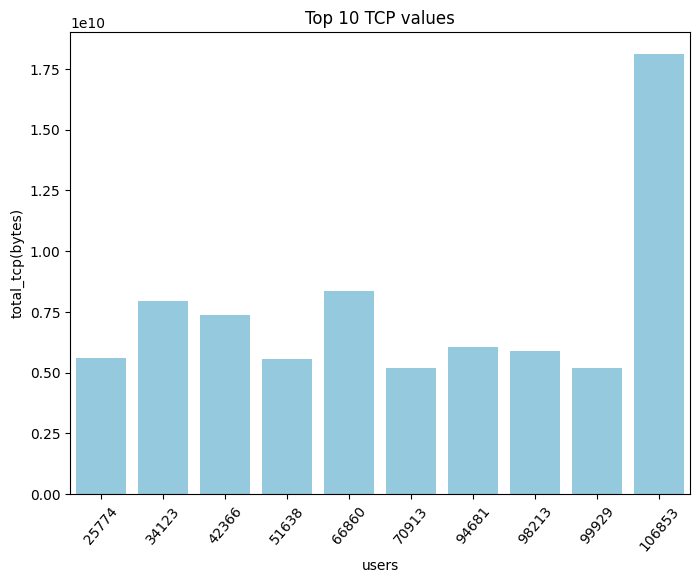

In [21]:
# top 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = top_tcp_values.index ,y = top_tcp_values['total_tcp(bytes)'], color="skyblue").set(title = 'Top 10 TCP values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 TCP values'), Text(0.5, 0, 'users')]

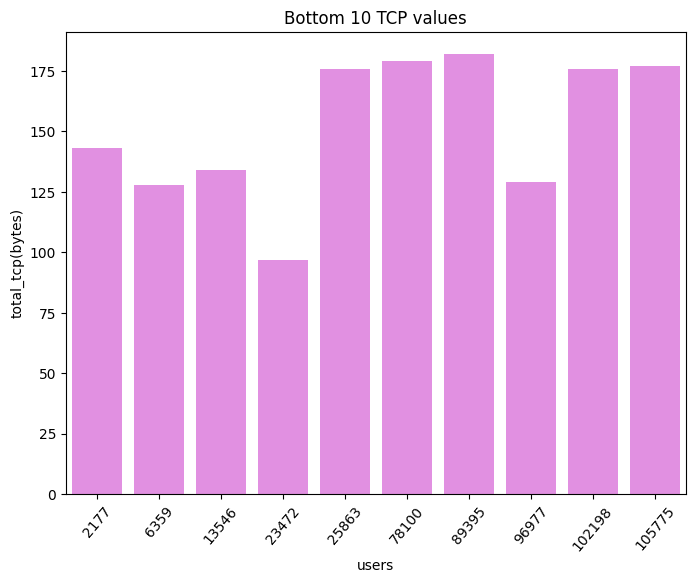

In [22]:
# bottom 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = bottom_tcp_values.index ,y = bottom_tcp_values['total_tcp(bytes)'], color="violet").set(title = 'Bottom 10 TCP values', xlabel = 'users')

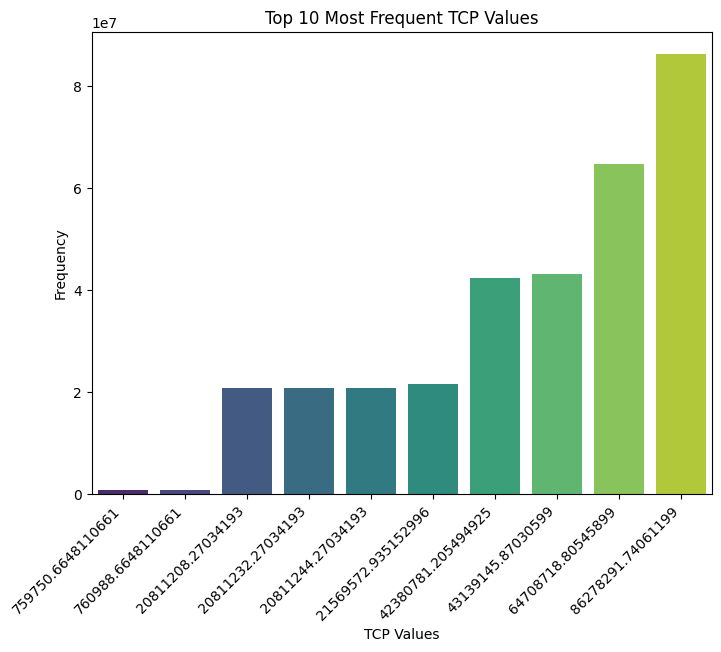

In [23]:
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_frequent_tcp_values.index, y='total_tcp(bytes)', data=most_frequent_tcp_values, palette="viridis")
plt.title('Top 10 Most Frequent TCP Values')
plt.xlabel('TCP Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [24]:
# rtt
top_rtt_values= agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).head(10)
bottom_rtt_values = agg_net_data.sort_values(by = 'total_rtt(ms)', ascending = False).tail(10)
most_frequent_rtt_values = pd.DataFrame(agg_net_data['total_rtt(ms)'].value_counts(ascending = False).head(10))

[Text(0.5, 1.0, 'Top 10 rtt values'), Text(0.5, 0, 'users')]

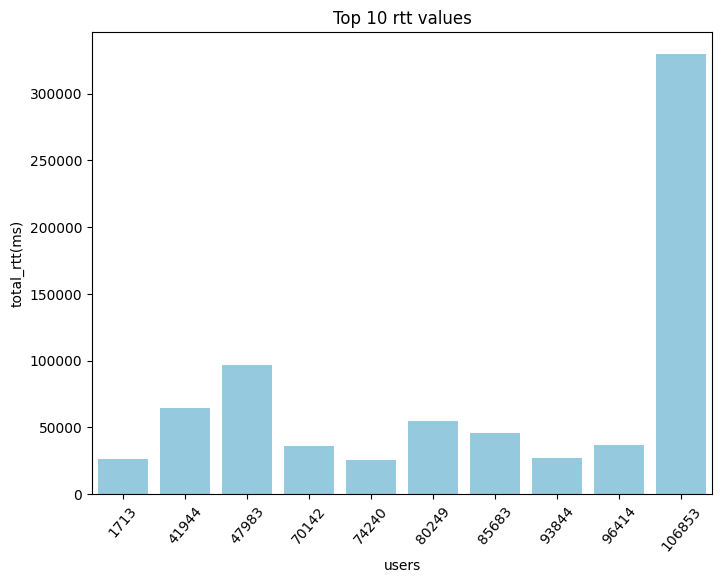

In [25]:
# top 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = top_rtt_values.index ,y = top_rtt_values['total_rtt(ms)'], color="skyblue").set(title = 'Top 10 rtt values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 rtt values'), Text(0.5, 0, 'users')]

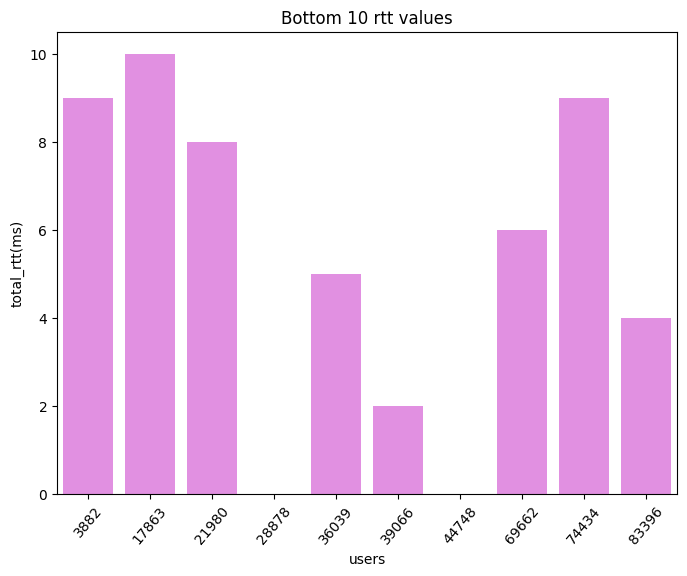

In [26]:
# bottom 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = bottom_rtt_values.index ,y = bottom_rtt_values['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 rtt values', xlabel = 'users')

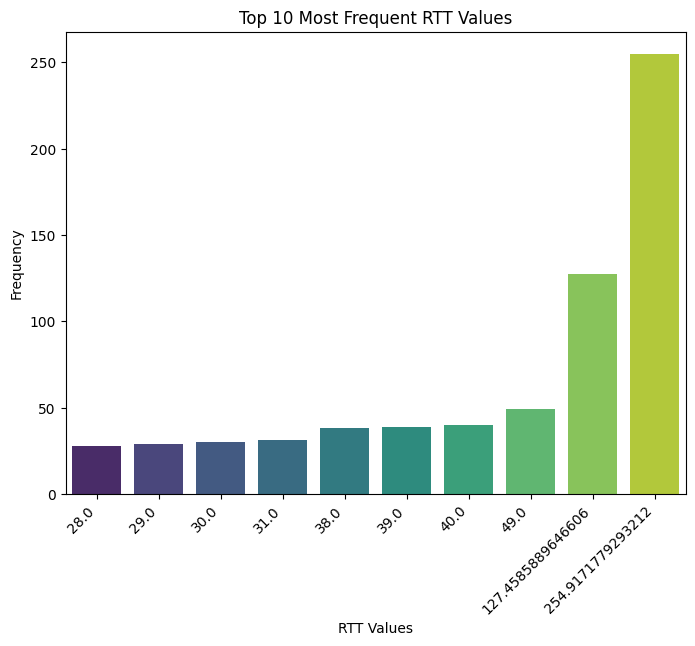

In [27]:
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_frequent_rtt_values.index, y='total_rtt(ms)', data=most_frequent_rtt_values, palette="viridis")
plt.title('Top 10 Most Frequent RTT Values')
plt.xlabel('RTT Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [28]:
# tp
top_tp_values = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).head(10)
bottom_tp_values = agg_net_data.sort_values(by = 'total_tp(kbps)', ascending = False).tail(10)
most_frequent_tp_values = pd.DataFrame(agg_net_data['total_tp(kbps)'].value_counts(ascending = False).head(10))

In [29]:
bottom_tp_values

,MSISDN/Number,Handset Type,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),total_tp(kbps),total_rtt(ms),total_tcp(bytes)
40346,3.366050e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
27067,3.365096e+10,2,219.591412,35.325766,22.0,90.0,4.161983e+07,1.519317e+06,0.0,254.917178,4.313915e+07
19036,3.363841e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
85825,3.369859e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
90941,3.375292e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
103186,3.377746e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
103236,3.377776e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
40785,3.366062e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
71456,3.366923e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07
1204,3.360413e+10,1,109.795706,17.662883,11.0,45.0,2.080991e+07,7.596587e+05,0.0,127.458589,2.156957e+07


[Text(0.5, 1.0, 'Top 10 tp values'), Text(0.5, 0, 'users')]

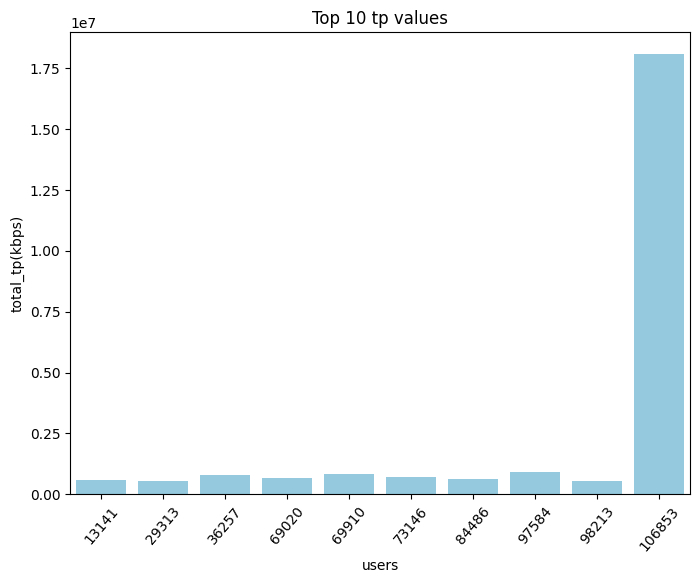

In [30]:
# top 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = top_tp_values.index ,y = top_tp_values['total_tp(kbps)'], color="skyblue").set(title = 'Top 10 tp values', xlabel = 'users')

[Text(0.5, 1.0, 'Bottom 10 tp values'), Text(0.5, 0, 'users')]

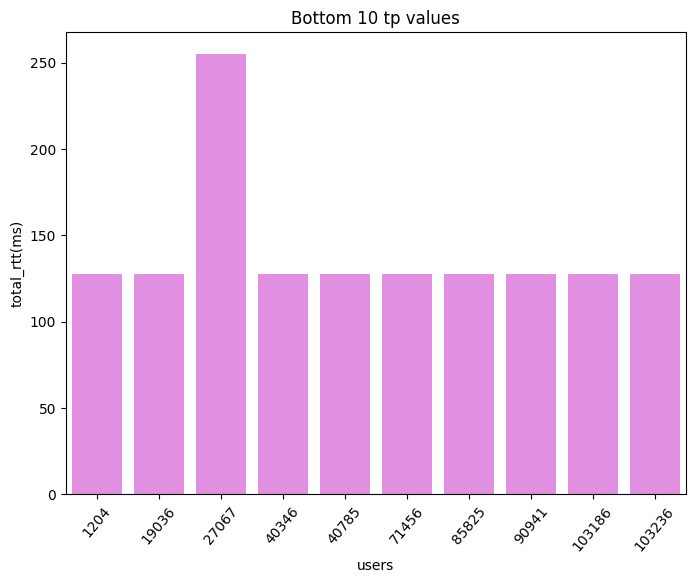

In [31]:
# bottom 10
plt.figure(figsize = (8,6))
plt.xticks(rotation = 50)
sns.barplot(x = bottom_tp_values.index ,y = bottom_tp_values['total_rtt(ms)'], color="violet").set(title = 'Bottom 10 tp values', xlabel = 'users')

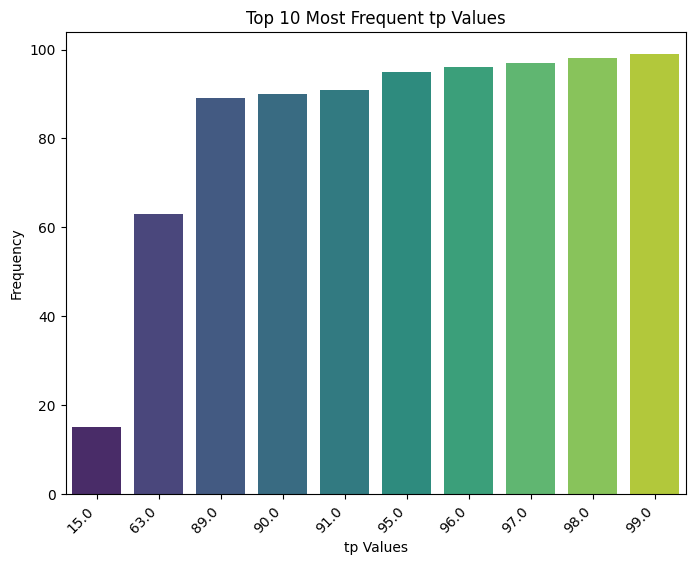

In [32]:
# Create a barplot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=most_frequent_tp_values.index, y='total_tp(kbps)', data=most_frequent_tp_values, palette="viridis")
plt.title('Top 10 Most Frequent tp Values')
plt.xlabel('tp Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Compute & report:

* The distribution of the average throughput per handset type and provide interpretation for your findings.

* The average TCP retransmission view per handset type and provide interpretation for your findings.

In [33]:
df1['total_tp(kbps)'] = df1['Avg Bearer TP DL (kbps)'] + df1['Avg Bearer TP UL (kbps)']
df1['total_rtt(ms)'] = df1['Avg RTT DL (ms)'] + df1['Avg RTT UL (ms)']
df1['total_tcp(bytes)'] = df1['TCP DL Retrans. Vol (Bytes)'] + df1['TCP UL Retrans. Vol (Bytes)']

handset_data = df1[['Handset Type', 'total_tp(kbps)', 'total_tcp(bytes)']]
agg_handset_data = handset_data.groupby('Handset Type').mean()
agg_handset_data.columns = ['avg_tp_per_set', 'avg_tcp_per_set']
agg_handset_data.head()

,avg_tp_per_set,avg_tcp_per_set
Handset Type,,
A-Link Telecom I. Cubot A5,23510.0,2.156957e+07
A-Link Telecom I. Cubot Note Plus,6699.0,6.162130e+05
A-Link Telecom I. Cubot Note S,8937.0,4.141173e+07
A-Link Telecom I. Cubot Nova,56217.0,1.371700e+05
A-Link Telecom I. Cubot Power,69468.0,8.041000e+03



 mu = 12400.34 and sigma = 14667.06



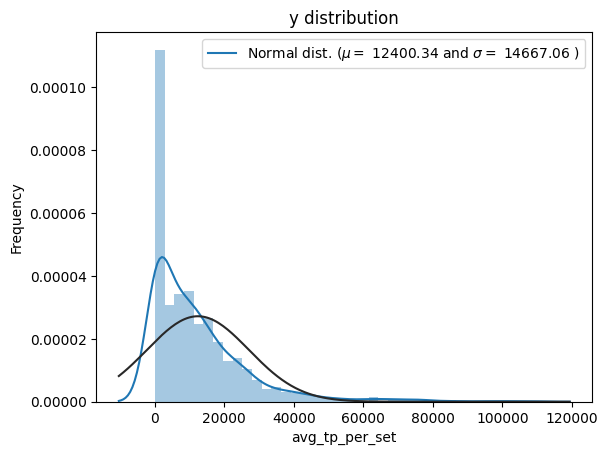

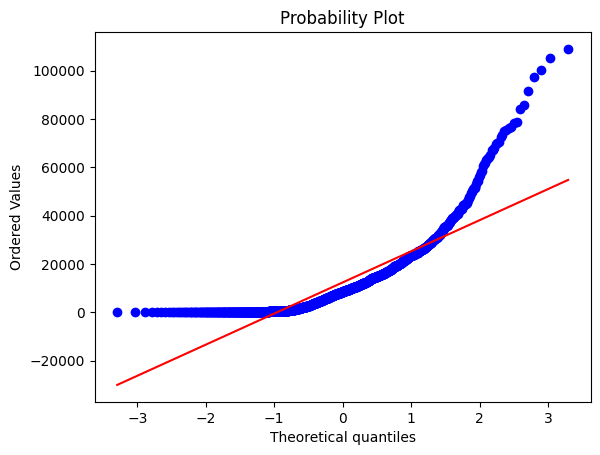

In [34]:
# Average throughput/handset ~ distribution
sns.distplot(agg_handset_data['avg_tp_per_set'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(agg_handset_data['avg_tp_per_set'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('y distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(agg_handset_data['avg_tp_per_set'], plot=plt)
plt.show()

Note:-Heavily right tailed - Highly skewed.

[Text(0.5, 1.0, 'Top 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

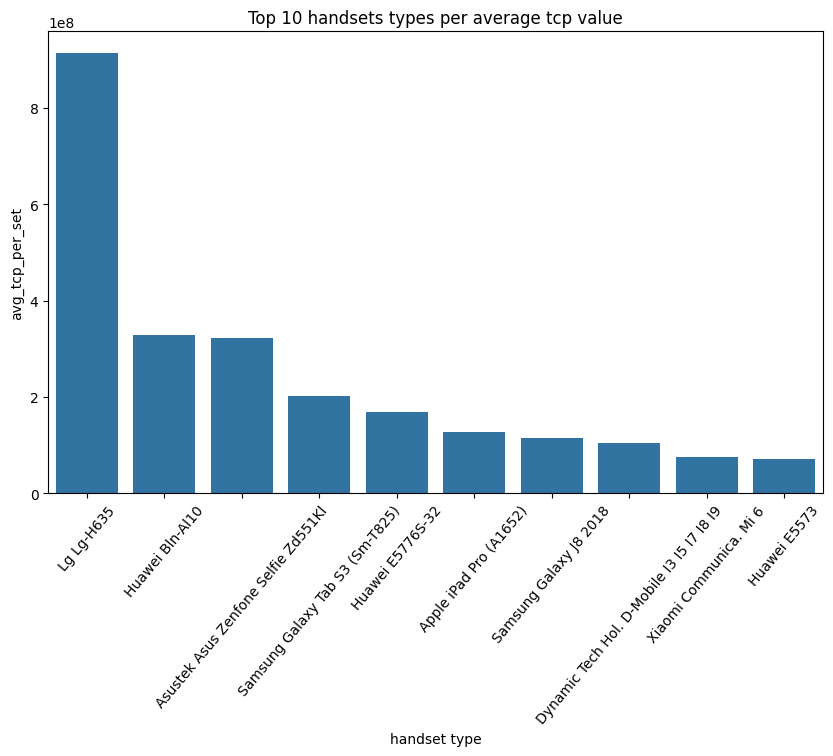

In [35]:
# The average TCP retransmission view per handset type and provide interpretation for your findings.
# aggregate function has already been applied 

# top 10 handsets per tcp average
a = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).head(10)

plt.figure(figsize = (10,6))
plt.xticks(rotation = 50)
sns.barplot(x = a.index ,y = a['avg_tcp_per_set']).set(title = 'Top 10 handsets types per average tcp value', xlabel = 'handset type')

Note:-6 of the handset types with highest average tcp values are from the top 3 handset manufacturers.

[Text(0.5, 1.0, 'Bottom 10 handsets types per average tcp value'),
 Text(0.5, 0, 'handset type')]

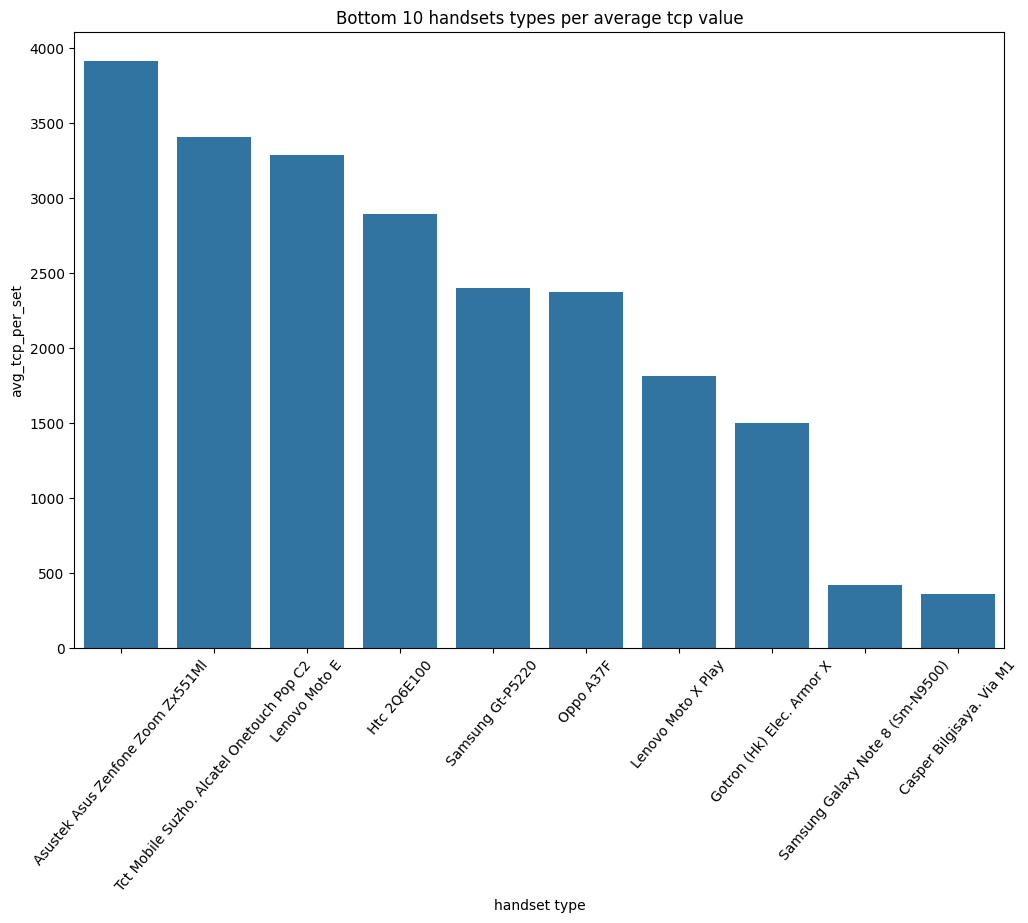

In [36]:
# bottom 10 handsets per tcp average
b = agg_handset_data.sort_values(by = 'avg_tcp_per_set', ascending = False).tail(10)

plt.figure(figsize = (12,8))
plt.xticks(rotation = 50)
sns.barplot(x = b.index ,y = b['avg_tcp_per_set']).set(title = 'Bottom 10 handsets types per average tcp value', xlabel = 'handset type')

Using the experience metrics above, perform a k-means clustering (where k = 3) to segment users into groups of experiences and provide a brief description of each cluster.
cluster_data

In [37]:
cluster_data = agg_net_data[['Handset Type', 'total_tp(kbps)', 'total_rtt(ms)',  'total_tcp(bytes)']]
norm_cluster_data = np.log1p(cluster_data)   #log transformation
norm_cluster_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes)
0,0.693147,4.343805,3.850148,16.886794
1,0.693147,4.605170,3.465736,16.886794
2,0.693147,4.584967,4.855607,16.886794
3,0.693147,5.517453,4.442651,13.542028
4,1.098612,10.948084,4.787492,17.247574


In [38]:
# kmeans on 3 clusters.
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
kmeans.fit(norm_cluster_data)
kmeans_data = kmeans.predict(norm_cluster_data)

In [39]:
# add the predicted clusters as a column in the df
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data['clusters'] = pd.Series(kmeans_data, index=cluster_data.index)
cluster_data.head()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
0,1,76.0,46.000000,2.156957e+07,1
1,1,99.0,31.000000,2.156957e+07,1
2,1,97.0,127.458589,2.156957e+07,1
3,1,248.0,84.000000,7.607247e+05,1
4,2,56844.0,119.000000,3.094040e+07,0


In [40]:
#clusters df
cluster_1 = cluster_data[cluster_data.clusters == 0]
cluster_2 = cluster_data[cluster_data.clusters == 1]
cluster_3 = cluster_data[cluster_data.clusters == 2]

In [41]:
# understand the clusters
cluster_1.describe()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
count,28928.000000,2.892800e+04,28928.000000,2.892800e+04,28928.0
mean,2.038233,6.015477e+04,266.020884,6.100139e+07,0.0
std,3.110094,1.223334e+05,2002.593862,3.103462e+08,0.0
min,1.000000,1.157000e+03,17.000000,1.183841e+06,0.0
25%,1.000000,1.968425e+04,88.000000,1.085009e+07,0.0
50%,2.000000,4.286100e+04,149.000000,2.188126e+07,0.0
75%,2.000000,7.667525e+04,261.458589,3.492977e+07,0.0
max,494.000000,1.807823e+07,329526.164724,1.810492e+10,0.0


In [42]:
# understand the clusters
cluster_2.describe()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
count,57867.000000,57867.000000,57867.000000,5.786700e+04,57867.0
mean,1.199181,161.199008,121.934653,2.522595e+07,1.0
std,0.500237,238.588215,721.290566,1.163534e+07,0.0
min,1.000000,0.000000,0.000000,2.398920e+05,1.0
25%,1.000000,77.000000,38.000000,2.156957e+07,1.0
50%,1.000000,99.000000,69.000000,2.156957e+07,1.0
75%,1.000000,132.000000,127.458589,2.156957e+07,1.0
max,9.000000,2340.000000,96924.000000,5.395976e+08,1.0


In [43]:
# understand the clusters
cluster_3.describe()

,Handset Type,total_tp(kbps),total_rtt(ms),total_tcp(bytes),clusters
count,20062.000000,20062.000000,20062.000000,2.006200e+04,20062.0
mean,1.050444,25476.072475,217.698689,5.512662e+05,2.0
std,0.247509,27977.769642,702.500921,5.077511e+05,0.0
min,1.000000,38.000000,19.000000,9.700000e+01,2.0
25%,1.000000,4779.250000,49.000000,7.449225e+04,2.0
50%,1.000000,16980.500000,72.000000,4.915755e+05,2.0
75%,1.000000,36922.250000,154.000000,7.924372e+05,2.0
max,5.000000,382871.000000,27278.000000,3.340765e+06,2.0
